In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import tree
import sklearn 
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
df= pd.read_csv('train.csv')

In [53]:
df.head(10)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1
5,6,31,0,Travel_Rarely,Sales,7,4,Life Sciences,941,2,...,3,0,13,2,7,7,5,2,2,1
6,7,32,1,Travel_Rarely,Research & Development,1,3,Life Sciences,331,4,...,3,0,4,2,3,2,1,2,1,1
7,8,33,0,Travel_Rarely,Research & Development,4,4,Medical,1502,1,...,3,0,8,5,5,4,0,2,5,1
8,9,35,0,Travel_Frequently,Sales,11,2,Marketing,1137,4,...,3,1,5,3,5,2,0,2,4,1
9,10,21,1,Travel_Rarely,Sales,7,1,Marketing,1780,2,...,3,0,1,3,1,0,1,0,5,1


In [4]:
test= pd.read_csv('train.csv')

In [5]:
test.head(10)

,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1
5,6,31,0,Travel_Rarely,Sales,7,4,Life Sciences,941,2,...,3,0,13,2,7,7,5,2,2,1
6,7,32,1,Travel_Rarely,Research & Development,1,3,Life Sciences,331,4,...,3,0,4,2,3,2,1,2,1,1
7,8,33,0,Travel_Rarely,Research & Development,4,4,Medical,1502,1,...,3,0,8,5,5,4,0,2,5,1
8,9,35,0,Travel_Frequently,Sales,11,2,Marketing,1137,4,...,3,1,5,3,5,2,0,2,4,1
9,10,21,1,Travel_Rarely,Sales,7,1,Marketing,1780,2,...,3,0,1,3,1,0,1,0,5,1


In [6]:
#One hot encoding

from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

In [8]:
df['BusinessTravel'] = labelencoder.fit_transform(df['BusinessTravel'])
df['Department'] = labelencoder.fit_transform(df['Department'])
df['EducationField'] = labelencoder.fit_transform(df['EducationField'])
df['Gender'] = labelencoder.fit_transform(train['Gender'])
df['JobRole'] = labelencoder.fit_transform(train['JobRole'])
df['MaritalStatus'] = labelencoder.fit_transform(train['MaritalStatus'])
df['OverTime'] = labelencoder.fit_transform(train['OverTime'])

In [12]:
(train['Attrition'].value_counts()/1470)*100

0    57.346939
1    53.401361
Name: Attrition, dtype: float64

In [13]:
data_n=train[['Age','MonthlyIncome','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]


In [14]:
data_n

,Age,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NumCompaniesWorked
0,30,2564,14,12,11,7,6,7,0
1,36,4663,12,7,3,2,1,1,9
2,55,5160,16,12,9,7,7,3,4
3,39,4108,13,18,7,7,1,7,7
4,37,9434,15,10,10,7,7,8,1
...,...,...,...,...,...,...,...,...,...
1623,42,2759,12,7,2,2,2,2,6
1624,55,5160,16,12,9,7,7,3,4
1625,25,4400,12,6,3,2,2,2,3
1626,29,2335,15,4,2,2,2,0,4


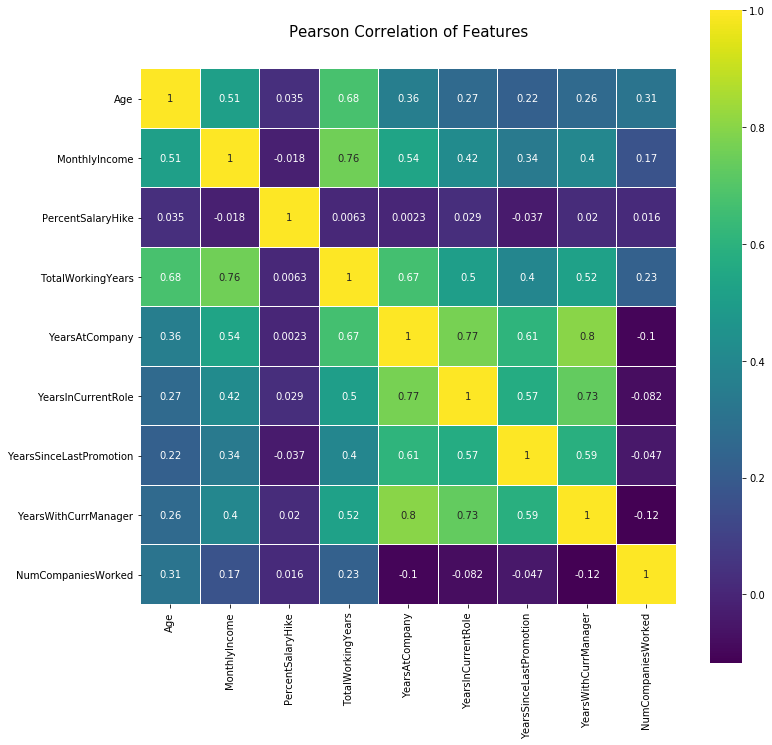

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [17]:
y=train['Attrition']
x=train.drop(train.columns[1], axis = 1)

In [50]:
x.head(10)

,Id,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,0,0,1,2,3,3,571,3,0,...,3,0,12,2,11,7,6,7,4,1
1,2,0,2,1,12,4,1,1614,3,0,...,3,2,7,2,3,2,1,1,2,1
2,3,1,2,2,2,1,3,842,3,1,...,3,0,12,3,9,7,7,3,5,1
3,4,0,2,1,24,1,1,2014,1,1,...,3,0,18,2,7,7,1,7,4,1
4,5,0,2,1,3,3,4,689,3,1,...,3,1,10,2,10,7,7,8,1,1
5,6,0,2,2,7,4,1,941,2,1,...,3,0,13,2,7,7,5,2,2,1
6,7,1,2,1,1,3,1,331,4,1,...,3,0,4,2,3,2,1,2,1,1
7,8,0,2,1,4,4,3,1502,1,0,...,3,0,8,5,5,4,0,2,5,1
8,9,0,1,2,11,2,2,1137,4,1,...,3,1,5,3,5,2,0,2,4,1
9,10,1,2,2,7,1,2,1780,2,1,...,3,0,1,3,1,0,1,0,5,1


In [21]:

avg_scores = []
parameter_values = np.arange(0,1, 0.01)
for i in parameter_values:
    estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = 52, min_impurity_decrease = i)
    scores = cross_val_score(estimator, x, y, scoring='accuracy', cv = 10)
    avg_scores.append(np.mean(scores))

In [22]:
i_opt = np.argmax(avg_scores)
print("The optimal value of 'min_impurity_decrease' is {0:.2f}".format(parameter_values[mid_opt])+
      " giving accuracy {0:.2f}".format(avg_scores[mid_opt]))

The optimal value of 'min_impurity_decrease' is 0.00 giving accuracy 1.00


In [23]:
estimator = tree.DecisionTreeClassifier(criterion="entropy", random_state = r_state
                                       , min_impurity_decrease = 0.007
                                       )
model=estimator.fit(x,y)
y_pred = estimator.predict(x)
accuracy_full = np.mean(y == y_pred) * 100
print("The accuracy on full training set is {0:.1f}%".format(accuracy_full))

The accuracy on full training set is 100.0%


In [51]:
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [25]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x, y)
print("Num Features: "+str(fit.n_features_))
print("Selected Features: "+str(fit.support_))
print("Feature Ranking: "+str(fit.ranking_))

Num Features: 3
Selected Features: [False  True False False False False False False False False False False
 False  True False False  True False False False False False False False
 False False False False]
Feature Ranking: [24  1 15 22 21 18 10 25  4 12  2 11  3  1 26 13  1 23 19  5 14  8 17  7
  9 16  6 20]


28
['attrition', 'behaviour', 'businesstravel', 'communicationskill', 'department', 'distancefromhome', 'education', 'educationfield', 'employeenumber', 'environmentsatisfaction', 'gender', 'id', 'jobinvolvement', 'jobrole', 'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'numcompaniesworked', 'overtime', 'percentsalaryhike', 'performancerating', 'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']


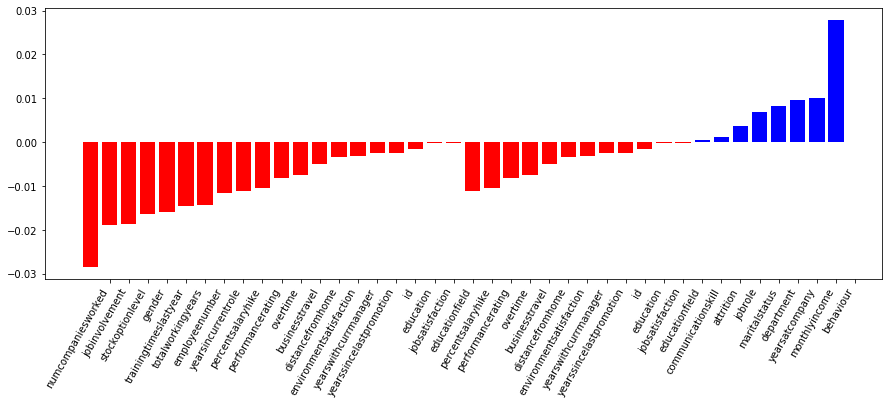

In [26]:
def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()
cv = CountVectorizer()
cv.fit(x)
print (len(cv.vocabulary_))
print (cv.get_feature_names())
svm = LinearSVC()
svm.fit(x, y)
plot_coefficients(svm, cv.get_feature_names())

In [31]:
#start_time = time.time()

train_M, test = sklearn.model_selection.train_test_split(train, train_size = 0.75,random_state=r_state)
train_M, val = sklearn.model_selection.train_test_split(train_M, train_size = 0.75,random_state=r_state)
print("For Main Data Set :",train['Attrition'].count())
print("For Train Set :",train_M['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train_M.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train_M['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 915
For Train Set : 514
For Validation Set : 172
For Test Set : 229


Acc Train: 0.830739, Acc Val:0.866279
Acc Train: 0.836576, Acc Val:0.866279
Acc Train: 0.859922, Acc Val:0.889535
Acc Train: 0.891051, Acc Val:0.895349
Acc Train: 0.953307, Acc Val:0.965116
Acc Train: 0.976654, Acc Val:0.988372
Acc Train: 0.998054, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000
Acc Train: 1.000000, Acc Val:1.000000


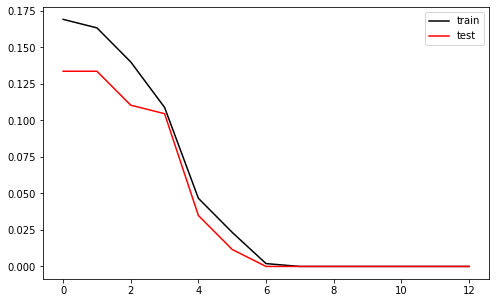

In [32]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=10,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=750,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=52)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.856


In [35]:
logreg = LogisticRegression(random_state=52,C=10)
logreg.fit(x_train, y_train)
start_time = time.time()


model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True        0    1
Predicted         
0          96    9
1          20  104
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       116
           1       0.84      0.92      0.88       113

    accuracy                           0.87       229
   macro avg       0.88      0.87      0.87       229
weighted avg       0.88      0.87      0.87       229

0.8733624454148472
Duration: --- 0.003867618242899577 Minutes ---


ROC AUC: 0.87


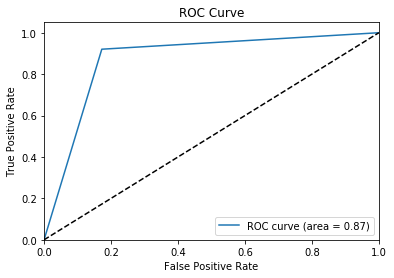

In [36]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.7469998857099318

In [38]:
y_train.value_counts()

0    263
1    251
Name: Attrition, dtype: int64